In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

#pulling in data
df = pd.read_csv(r'/content/drive/My Drive/ML Datasets/Uber_Ride_Reviews.csv')
df.head()

,ride_review,ride_rating,sentiment
0,I completed running New York Marathon requeste...,1.0,0
1,My appointment time auto repairs required earl...,1.0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0


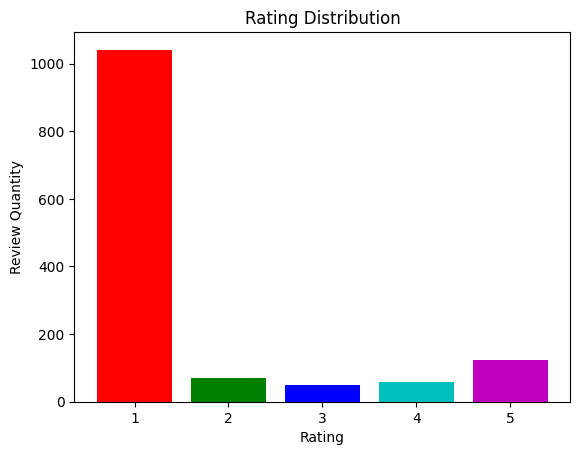

In [29]:
groups = df.groupby('ride_rating').count()
Values = groups.ride_review
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [30]:
null_count = df.isnull().sum()
null_count

ride_review    0
ride_rating    0
sentiment      0
dtype: int64

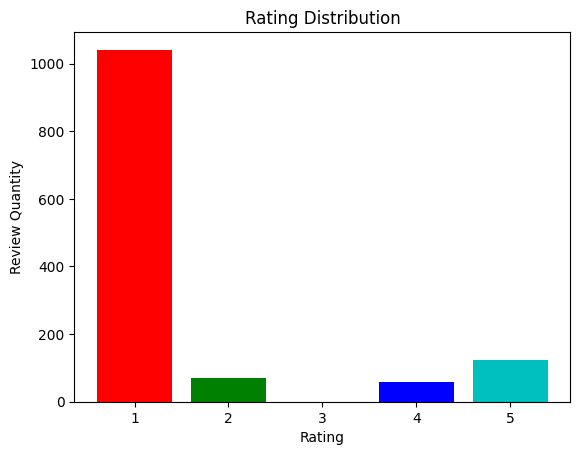

In [31]:
#deleting all instances with ride_rating = 3
df = df[df.ride_rating != 3]#handling neutral sentiments

#seperating by groups
groups = df.groupby('ride_rating').count()
Values = groups.ride_review
colors = ['r', 'g', 'b', 'c']#red green blue cyan

#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [32]:
#creating new binary_class column
df['binary_class'] = np.where(df['ride_rating'] > 3, 1, 0) # 1 for greater than 3 and 0 for less than 3
df

,ride_review,ride_rating,sentiment,binary_class
0,I completed running New York Marathon requeste...,1.0,0,0
1,My appointment time auto repairs required earl...,1.0,0,0
2,Whether I using Uber ride service Uber Eats or...,1.0,0,0
3,Why hard understand I trying retrieve Uber cab...,1.0,0,0
4,I South Beach FL I staying major hotel ordered...,1.0,0,0
...,...,...,...,...
1339,everyone knows uber fast couple drinks night w...,2.0,0,0
1340,For service asks credit card number right bat ...,1.0,0,0
1341,great service hiring drivers know way around t...,2.0,0,0
1342,Uber several problems make poor experience con...,1.0,0,0


In [33]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['ride_review'], df['binary_class'], random_state = 0)

#setting random number between 1 and 1000
number = random.randint(1,1000)

#printing random training text and X_train shape
print ('Random Review:')
print(' ')
print(X_train[number])
print(' ')
print('X_train shape: ' + str(X_train.shape))# number of rows for training

Random Review:
 
On Feb night I boarding Uber cab daughter booked driver started without checking I got door closed Result right foot came wheel car I shout stop I asked reverse car took good five minutes inched back bit I told reverse foot still stuck yell decided move back The pain unbearable I go hospital insurance left back daughters decided India go hospital due language barrier France comprehending English challenge I want wrong diagnosis I ended ligament tear right ankle take long heal I submitted hospital report Uber told compensate injury I wrote uber support Natasha called today asked I insurance I Paris I told instead asking claim insurance Uber actually pay compensation injury unwarranted pain caused due negligence uber driver duty I shocked responded Uber responsible anything happens customer ride I take company driver works ridiculous shame established company like Uber washing responsibility leaving affected passenger sort third party The cab booked uber saying uber resp

In [11]:
# Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer # to convert the text data in X_train into a matrix of token counts

# Creating a variable which assigns X_train to numbers
vect = CountVectorizer().fit(X_train)
#Fitting in this context means that the vectorizer learns the vocabulary of the training data and transforms it into a matrix of token counts.

# Translates numbers back to text
feature_names = vect.get_feature_names_out()
print(feature_names[1:10])


['abandoned' 'ability' 'able' 'about' 'abrupt' 'absence' 'absolute'
 'absolutely' 'absorb']


In [12]:
#length of total words
len(vect.get_feature_names_out())

6607

In [13]:
#creating matrix array for logistic regression
X_train_vectorized = vect.transform(X_train)
print (X_train_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
#creating log regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [35]:
#calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
# ROC Receiver Operating Characteristic
# AUC Area under the curve
# A model with an AUC between 0.5 and 1 is better than random guessing, with a higher AUC indicating better performance.

AUC:  0.7549863444508814


In [16]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names_out())

#creating array of all the regression coefficients per word
coef_index = model.coef_[0]

#creating df with both arrays in it
df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})

#sorting by coefficient
df.sort_values('Coef')

,Word,Coef
913,charged,-1.008715
3820,never,-0.938884
1364,customer,-0.738470
240,another,-0.684385
3179,know,-0.671529
...,...,...
4433,professional,0.918334
6234,used,0.936761
1224,convenient,1.002479
5016,safe,1.030542


In [21]:
print(model.predict(vect.transform(['abandoned great'])))
print(model.predict(vect.transform(['great she the best'])))
print(model.predict(vect.transform(['charged slow horrible'])))
print(model.predict(vect.transform(['it was as average as a trip could be'])))
print(model.predict(vect.transform(['my family felt safe we got to our destination with ease'])))
print(model.predict(vect.transform(['i got to my destination quickly and affordably i had a smile on my face from start to finish'])))

[1]
[1]
[0]
[0]
[0]
